How to select the best gingerbread from a jar of concealed gingerbreads, assuming that each gingerbread has a unique and umabiguous ranking.  This is also known as the secretary problem, but here secretaries are gingerbread men.

The rules are that you pick a gingerbread from the jar and then either select or discard it.  But if you select it, then the game ends, and that is the gingerbread you end up with.  If you discard it, then you get to select another gingerbread, and so on.  The aim is to select the best possible gingerbread.  

Theory says that the best approach is to discard the first 37% of the gingerbreads and then to select the best one that you have seen after that.  

Here we run experiments to simulate the results that one gets using a strategy of the same kind, but with a different stopping value.  The stopping value is called an $r$-value in the code.  That is, you might sample 10% of the gingerbreads before selecting the next best one (r-value = 10 %), or 40%, or 50%, etc.  We find $r$-values between 30% and 40% perform very well.  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# Run a bunch of experiments where the gingerbreads are represented as distinct integers between 0 and 99 inclusive, with the best gingerbread being gingerbread 99.
# Try all r-values and record the success of each (most implied).

result = []
number_of_experiments = 10000
for i in range(0,number_of_experiments,1):
    # Each experiment begins with a random arrangement of the numbers between 0 and 99 inclusive.
    # The question is which location in the gingerbreads array contains the number 99.
    gingerbreads = np.random.choice(a=np.arange(0,100,1), size=100, replace=False)

    # Run the strategy of discarding the first r gingerbreads we encounter (those in locations 0:r) and 
    # then selecting the first gingerbread we find after that which is better than every ginerbread in the first r gingerbreads (if any)
    best_gingerbread = 99
    if gingerbreads[0] == best_gingerbread:
        result.append((0, None, best_gingerbread, 0)) # this is the r = 0 case
    else:
        # For each experiment, we try every possible value of r, from 0 to 100 (0 was already tried above)
        r_value = 1
        while r_value < len(gingerbreads):
            best_rejected_gingerbread = max(gingerbreads[0:r_value])
            for j in range(r_value,len(gingerbreads)):
                if gingerbreads[j] > best_rejected_gingerbread:
                    break # if here, then we have found our stopping point
            selected_gingerbread = gingerbreads[j] # we select the last gingerbread in the worst case
            index_of_selected_gingerbread = j

            if selected_gingerbread == best_gingerbread:
                result.append((r_value, best_rejected_gingerbread, selected_gingerbread, index_of_selected_gingerbread))
            # We are only counting successful cases, as we can deduce the number of unsuccessful ones from the total number of cases

            # Any r value between the r value we just used and the index of the selected gingerbread will necessarily
            # produce the same outcome, so (to save time) we can skip checking of all those cases.
            # See column 'number_of_implied_successes'
            r_value = index_of_selected_gingerbread + 1 # set r-value to next value that will give a different outcome


In [3]:
# Put our results in a data frame
df = pd.DataFrame(data=result, columns=['r_value', 'best_rejected_gingerbread', 'selected_gingerbread', 'index_of_selected_gingerbread'])
df['best_rejected_gingerbread'] = df['best_rejected_gingerbread'].astype(dtype=pd.Int64Dtype())
df['number_of_implied_successes'] = 1 + df['index_of_selected_gingerbread'] - df['r_value']
df

r_value  best_rejected_gingerbread  selected_gingerbread   
0           3                         81                    99  \
1          25                         98                    99   
2          27                         98                    99   
3          69                         98                    99   
4          54                         96                    99   
...       ...                        ...                   ...   
9995        9                         98                    99   
9996       42                         98                    99   
9997       67                         98                    99   
9998        4                         86                    99   
9999       13                         90                    99   

      index_of_selected_gingerbread  number_of_implied_successes  
0                                 3                            1  
1                                64                           40  
2                                62                           36  
3                                85                           17  
4                                54                            1  
...                             ...                          ...  
9995                             18                           10  
9996                             71                           30  
9997                             82                           16  
9998                             15                           12  
9999                             14                            2  

[10000 rows x 5 columns]

Our results data frame has as many rows as there were experiments, because in each experiment, there is only one best gingerbread!

AND we only recorded the minimum r-value that gave the best gingerbread... 

For example, suppose a particular experiment had its first successful r_value at 6, finding the best gingerbread at position 50.  Then r_values of 7,8,9,...,50 will also produce the same outcome, so we know that 1 + 50 - 6 = 45 r-values return the best gingerbread, and that any r-value < 6 or > 50 will give a suboptimal gingerbread.  That is why we only need one row per experiment, to describe all possible outcomes, for all possible r-values.

We ran 10 000 experiments, each checking all 100 values of r (= 1 million simulations).

In [4]:
# count the number of times each value of r gives the best gingerbread
r_success_count = {}

for row in df[['r_value', 'index_of_selected_gingerbread']].to_numpy():
    for r in np.arange(row[0],row[1]+1):
        if r not in r_success_count:
            r_success_count[r]=1
        else:
            r_success_count[r]=r_success_count[r]+1

The code above attributes a success to each value of $r$ between the minimum $r$-value that achieved succcess and the $r$-value equal to the index of the selected gingerbread.
This work is necessary because we chose to save time in the simulations.

In [5]:
#order the results of the experment from most to least sucessful
success_counts = np.array(sorted(r_success_count.items(), key=lambda x: -x[1]))

In [6]:
success_counts[0:5,:]

array([[  37, 3788],
       [  35, 3783],
       [  36, 3778],
       [  34, 3775],
       [  38, 3770]])

Text(0.5, 1.0, 'Success Rate vs Stopping Point')

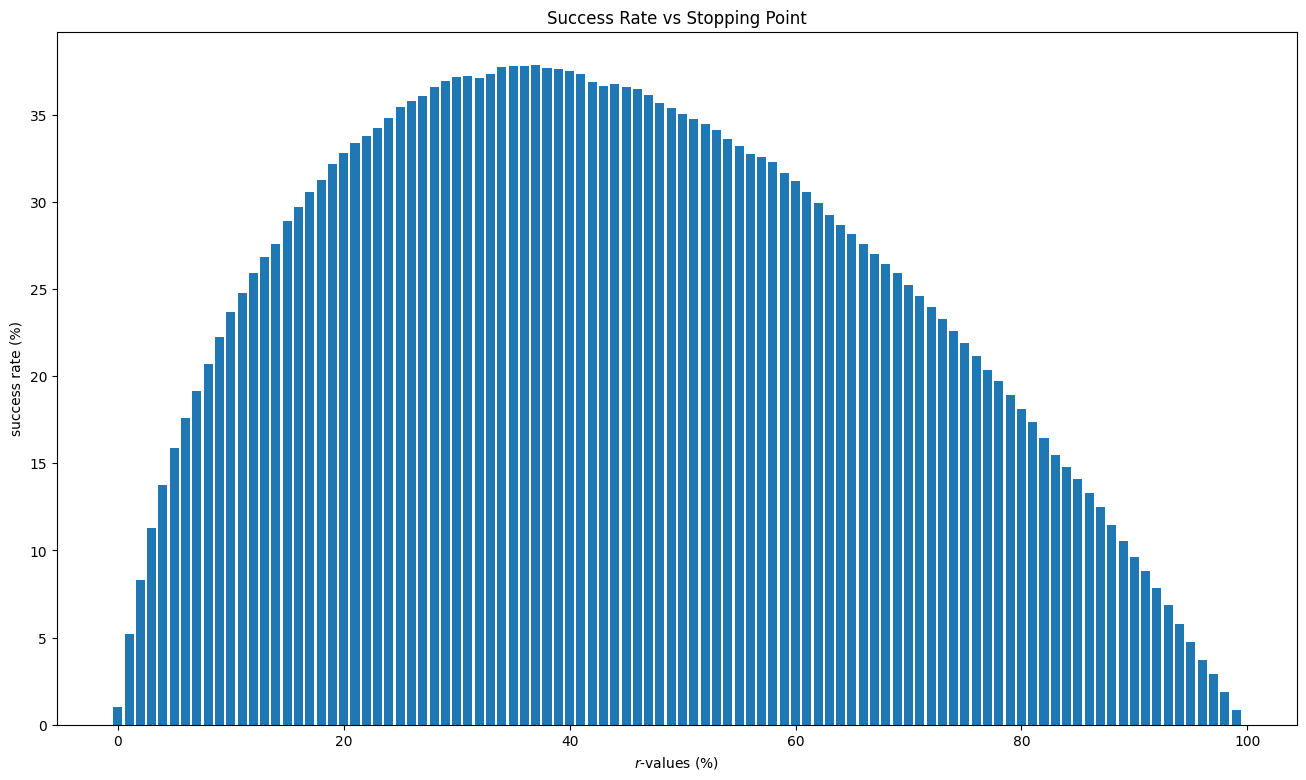

In [14]:
#plot a graph of r-values vs success count
fig,ax = plt.subplots(figsize=(16,9))

ax.bar(x=success_counts[:,0], height=100*success_counts[:,1]/number_of_experiments)

ax.set_xlabel('$r$-values (%)')
ax.set_ylabel('success rate (%)')

ax.set_title('Success Rate vs Stopping Point')

As expected, the greatest success is given by an r-value of ~ 37% and good results are obtained for r-values either side (between about 30 and 40).  At $r$ = 37%, the succcess rate is also ~ 37%.